# Usage (details: policy measures)
Here, we will analyse the relationship of policy measures and parameter values of SIR-derived ODE models. Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
from pprint import pprint

In [3]:
import covsirphy as cs
cs.__version__

'2.9.1'

In [4]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=False)
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation


## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [5]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
# The number of registerd countries
len(analyser.countries)

185

In [6]:
# We can get Scenario instance for detailed scenario analysis
type(analyser.scenario("Japan"))

covsirphy.analysis.scenario.Scenario

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **12th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [7]:
# Show the number of phases of all countries
analyser.trend()
pprint(analyser.phase_len(), compact=True)

{4: ['Tanzania', 'Fiji', 'Holy See'],
 5: ['Georgia', 'Grenada', 'Hungary', 'Brunei', 'Slovenia', 'Myanmar'],
 6: ['Yemen', 'Seychelles', 'Jordan', 'Cambodia', 'Mauritius', 'Czech Republic',
     'Slovakia', 'Dominica', 'Andorra', 'Equatorial Guinea', 'Tunisia',
     'Papua New Guinea', 'Libya', 'Ireland'],
 7: ['South Sudan', 'Lithuania', 'Liechtenstein', 'Lesotho',
     'Trinidad and Tobago', 'Central African Republic', 'Guinea-Bissau',
     'Jamaica', 'Paraguay', 'Spain', 'Uganda', 'Gambia', 'Iceland', 'Bahamas',
     'Colombia', 'Kazakhstan', 'Sao Tome and Principe', 'Belize', 'Zimbabwe',
     'Montenegro'],
 8: ['Cameroon', 'Guyana', 'Namibia', 'Australia', 'Zambia', 'Nicaragua',
     'Saint Lucia', 'Monaco', 'Luxembourg', 'Comoros', 'Chad', 'Cyprus',
     'Djibouti', 'Burkina Faso', 'Malta', 'Morocco', 'Antigua and Barbuda',
     'Greece', 'New Zealand', 'Benin', 'Lebanon', 'Nepal', 'Malawi', 'Austria',
     'Saint Vincent and the Grenadines', 'Thailand', 'Israel', 'Netherlands',

In [8]:
# Set phases with S-R trend analysis
analyser.trend(min_len=12)
# The number of countries
len(analyser.countries)

18

In [9]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{12: ['Iran', 'Turkey', 'Mexico', 'United Arab Emirates', 'United States',
      'Bahrain', 'Egypt', 'Dominican Republic', 'Bangladesh', 'Kuwait',
      'Brazil', 'Italy', 'Peru', 'Iraq', 'Nigeria', 'Algeria'],
 13: ['Bolivia', 'Russia']}


In [10]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population
Country Phase                                        
Bolivia 0th    Past  01Apr2020  13Jun2020    11353142
        1st    Past  14Jun2020  25Jun2020    11353142
        2nd    Past  26Jun2020  05Jul2020    11353142
        3rd    Past  06Jul2020  14Jul2020    11353142
        4th    Past  15Jul2020  22Jul2020    11353142
        5th    Past  23Jul2020  31Jul2020    11353142
        6th    Past  01Aug2020  09Aug2020    11353142
        7th    Past  10Aug2020  17Aug2020    11353142
        8th    Past  18Aug2020  25Aug2020    11353142
        9th    Past  26Aug2020  03Sep2020    11353142
        10th   Past  04Sep2020  12Sep2020    11353142
        11th   Past  13Sep2020  27Sep2020    11353142
        12th   Past  28Sep2020  25Oct2020    11353142
Russia  0th    Past  12Feb2020  07May2020   330457362
        1st    Past  08May2020  19May2020   330457362
        2nd    Past  20May2020  31May2020   330457362
        3rd    Past  01Jun2020  12Jun2020   330457362
        4th    Past  13Jun2020  26Jun2020   330457362
        5th    Past  27Jun2020  10Jul2020   330457362
        6th    Past  11Jul2020  24Jul2020   330457362
        7th    Past  25Jul2020  10Aug2020   330457362
        8th    Past  11Aug2020  28Aug2020   330457362
        9th    Past  29Aug2020  15Sep2020   330457362
        10th   Past  16Sep2020  29Sep2020   330457362
        11th   Past  30Sep2020  09Oct2020   330457362
        12th   Past  10Oct2020  25Oct2020   330457362

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [11]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	USA,  3rd phase (04Jul2020 - 15Jul2020): finished  663 trials in 0 min 15 sec

	DOM,  4th phase (15Jul2020 - 23Jul2020): finished  480 trials in 0 min 10 sec

	BOL,  0th phase (01Apr2020 - 13Jun2020): finished 1936 trials in 1 min  0 sec

	DOM,  8th phase (21Aug2020 - 03Sep2020): finished 1986 trials in 1 min  0 sec

	BHR,  8th phase (03Sep2020 - 14Sep2020): finished 1985 trials in 1 min  0 sec

	IRN,  5th phase (05Jul2020 - 23Jul2020): finished  472 trials in 0 min 10 sec

	RUS,  3rd phase (01Jun2020 - 12Jun2020): finished 2001 trials in 1 min  0 sec

	IRQ,  5th phase (18Aug2020 - 27Aug2020): finished  477 trials in 0 min 10 sec

	DOM,  3rd phase (03Jul2020 - 14Jul2020): finished 1999 trials in 1 min  0 sec

	BOL,  1st phase (14Jun2020 - 25Jun2020): finished 2008 trials in 1 min  0 sec

	USA,  7th phase (20Aug2020 - 02Sep2020): finished  252 trials in 0 min  5 sec

	BGD,  7th phase (12Aug2020 - 23Aug2020): finished 2015 trials in 1 min  0 sec

	IRQ,  1st phase (24Jun2020 - 09Jul2020): finished 1994 trials in 1 min  0 sec

	IRN,  7th phase (12Aug2020 - 31Aug2020): finished  251 trials in 0 min  5 sec

	ITA,  2nd phase (30Mar2020 - 11Apr2020): finished 1979 trials in 1 min  0 sec

	KWT,  7th phase (09Aug2020 - 23Aug2020): finished 1974 trials in 1 min  0 sec

	DZA,  9th phase (24Aug2020 - 05Sep2020): finished  253 trials in 0 min  5 sec

	KWT,  4th phase (23Jun2020 - 07Jul2020): finished 1990 trials in 1 min  0 sec

	DZA, 10th phase (06Sep2020 - 25Sep2020): finished  844 trials in 0 min 20 sec

	BGD,  3rd phase (29Jun2020 - 07Jul2020): finished 1191 trials in 0 min 30 sec

	IRN,  6th phase (24Jul2020 - 11Aug2020): finished 1992 trials in 1 min  0 sec

	KWT,  3rd phase (09Jun2020 - 22Jun2020): finished 1992 trials in 1 min  0 sec

	BOL,  4th phase (15Jul2020 - 22Jul2020): finished 1995 trials in 1 min  0 sec

	RUS,  1st phase (08May2020 - 19May2020): finished 1987 trials in 1 min  0 sec

	ARE,  4th phase (12Jun2020 - 01Jul2020): finished 1964 trials in 1 min  0 sec

	NGA,  0th phase (18Mar2020 - 21May2020): finished 1944 trials in 1 min  0 sec

	DOM,  0th phase (24Mar2020 - 22May2020): finished 1957 trials in 1 min  0 sec

	BHR,  7th phase (12Aug2020 - 02Sep2020): finished 1988 trials in 1 min  0 sec

	USA,  1st phase (04May2020 - 12Jun2020): finished 1956 trials in 1 min  0 sec

	NGA,  7th phase (28Jul2020 - 07Aug2020): finished 1991 trials in 1 min  0 sec

	ITA,  3rd phase (12Apr2020 - 26Apr2020): finished 1971 trials in 1 min  0 sec

	BOL,  7th phase (10Aug2020 - 17Aug2020): finished  257 trials in 0 min  5 sec

	ARE,  5th phase (02Jul2020 - 18Jul2020): finished 1971 trials in 1 min  0 sec

	PER,  6th phase (08Aug2020 - 17Aug2020): finished 1988 trials in 1 min  0 sec

	IRN,  2nd phase (06May2020 - 30May2020): finished 1984 trials in 1 min  0 sec

	IRN,  3rd phase (31May2020 - 16Jun2020): finished 1339 trials in 0 min 35 sec

	DOM,  9th phase (04Sep2020 - 17Sep2020): finished 2011 trials in 1 min  0 sec

	PER,  0th phase (16Mar2020 - 09May2020): finished 1954 trials in 1 min  0 sec

	USA,  4th phase (16Jul2020 - 27Jul2020): finished  254 trials in 0 min  5 sec

	BHR,  9th phase (15Sep2020 - 23Sep2020): finished 2003 trials in 1 min  0 sec

	NGA,  9th phase (19Aug2020 - 02Sep2020): finished  476 trials in 0 min 10 sec

	DZA,  6th phase (28Jul2020 - 04Aug2020): finished  262 trials in 0 min  5 sec

	BGD,  5th phase (18Jul2020 - 29Jul2020): finished  686 trials in 0 min 15 sec

	EGY,  5th phase (03Jul2020 - 13Jul2020): finished  259 trials in 0 min  5 sec

	NGA,  2nd phase (09Jun2020 - 18Jun2020): finished 1830 trials in 0 min 55 sec

	RUS,  2nd phase (20May2020 - 31May2020): finished 1941 trials in 1 min  0 sec

	BRA,  3rd phase (26Jun2020 - 08Jul2020): finished 1957 trials in 1 min  0 sec

	ITA,  0th phase (24Feb2020 - 20Mar2020): finished 1921 trials in 1 min  0 sec

	RUS,  4th phase (13Jun2020 - 26Jun2020): finished 1986 trials in 1 min  0 sec

	BRA,  6th phase (31Jul2020 - 09Aug2020): finished  252 trials in 0 min  5 sec

	MEX,  9th phase (09Sep2020 - 24Sep2020): finished 1982 trials in 1 min  0 sec

	KWT,  8th phase (24Aug2020 - 07Sep2020): finished 1845 trials in 0 min 55 sec

	DZA,  4th phase (09Jul2020 - 19Jul2020): finished  473 trials in 0 min 10 sec

	PER,  1st phase (10May2020 - 28May2020): finished 1968 trials in 1 min  0 sec

	TUR,  6th phase (02Jul2020 - 24Jul2020): finished  252 trials in 0 min  5 sec

	USA,  9th phase (18Sep2020 - 01Oct2020): finished  846 trials in 0 min 20 sec

	TUR,  7th phase (25Jul2020 - 16Aug2020): finished 1963 trials in 1 min  0 sec

	USA,  2nd phase (13Jun2020 - 03Jul2020): finished 1972 trials in 1 min  0 sec

	MEX,  7th phase (11Aug2020 - 25Aug2020): finished 1977 trials in 1 min  0 sec

	IRN,  9th phase (19Sep2020 - 01Oct2020): finished  668 trials in 0 min 15 sec

	DZA,  5th phase (20Jul2020 - 27Jul2020): finished 1486 trials in 0 min 40 sec

	USA,  5th phase (28Jul2020 - 06Aug2020): finished  476 trials in 0 min 10 sec

	BGD, 10th phase (18Sep2020 - 04Oct2020): finished  465 trials in 0 min 10 sec

	BRA,  4th phase (09Jul2020 - 20Jul2020): finished  482 trials in 0 min 10 sec

	BRA, 11th phase (25Sep2020 - 25Oct2020): finished 1966 trials in 1 min  0 sec

	BHR,  5th phase (08Jul2020 - 22Jul2020): finished 2000 trials in 1 min  0 sec

	MEX,  1st phase (24May2020 - 10Jun2020): finished 2001 trials in 1 min  0 sec

	TUR,  0th phase (24Mar2020 - 16Apr2020): finished 1980 trials in 1 min  0 sec

	BRA, 10th phase (11Sep2020 - 24Sep2020): finished 1980 trials in 1 min  0 sec

	RUS, 10th phase (16Sep2020 - 29Sep2020): finished 1983 trials in 1 min  0 sec

	PER,  2nd phase (29May2020 - 18Jun2020): finished 1969 trials in 1 min  0 sec

	USA,  0th phase (09Feb2020 - 03May2020): finished 1930 trials in 1 min  0 sec

	MEX,  4th phase (07Jul2020 - 17Jul2020): finished 1186 trials in 0 min 30 sec

	BGD,  4th phase (08Jul2020 - 17Jul2020): finished 1029 trials in 0 min 25 sec

	EGY,  7th phase (28Jul2020 - 09Aug2020): finished  473 trials in 0 min 10 sec

	EGY,  8th phase (10Aug2020 - 26Aug2020): finished  250 trials in 0 min  5 sec

	DOM,  2nd phase (16Jun2020 - 02Jul2020): finished 1984 trials in 1 min  0 sec

	ARE,  0th phase (12Feb2020 - 01May2020): finished 1934 trials in 1 min  0 sec

	DOM,  1st phase (23May2020 - 15Jun2020): finished 1975 trials in 1 min  0 sec

	PER,  5th phase (29Jul2020 - 07Aug2020): finished 1989 trials in 1 min  0 sec

	BOL, 10th phase (04Sep2020 - 12Sep2020): finished 1977 trials in 1 min  0 sec

	ARE,  1st phase (02May2020 - 15May2020): finished 1967 trials in 1 min  0 sec

	IRN,  8th phase (01Sep2020 - 18Sep2020): finished 1982 trials in 1 min  0 sec

	PER, 11th phase (01Oct2020 - 25Oct2020): finished 1980 trials in 1 min  0 sec

	BRA,  9th phase (30Aug2020 - 10Sep2020): finished 1977 trials in 1 min  0 sec

	EGY,  6th phase (14Jul2020 - 27Jul2020): finished 1981 trials in 1 min  0 sec

	ITA,  8th phase (28Aug2020 - 18Sep2020): finished  251 trials in 0 min  5 sec

	TUR, 10th phase (21Sep2020 - 09Oct2020): finished  252 trials in 0 min  5 sec

	DZA, 11th phase (26Sep2020 - 25Oct2020): finished  443 trials in 0 min 10 sec

	MEX,  0th phase (03Mar2020 - 23May2020): finished 1926 trials in 1 min  0 sec

	BOL,  9th phase (26Aug2020 - 03Sep2020): finished  256 trials in 0 min  5 sec

	NGA, 10th phase (03Sep2020 - 29Sep2020): finished 1976 trials in 1 min  0 sec

	PER, 10th phase (18Sep2020 - 30Sep2020): finished 1985 trials in 1 min  0 sec

	ARE,  9th phase (23Sep2020 - 01Oct2020): finished  256 trials in 0 min  5 sec

	BGD,  2nd phase (19Jun2020 - 28Jun2020): finished 1756 trials in 0 min 50 sec

	USA,  6th phase (07Aug2020 - 19Aug2020): finished  851 trials in 0 min 20 sec

	IRN, 11th phase (14Oct2020 - 25Oct2020): finished  469 trials in 0 min 10 sec

	RUS,  8th phase (11Aug2020 - 28Aug2020): finished 1986 trials in 1 min  0 sec

	BRA,  7th phase (10Aug2020 - 19Aug2020): finished 1989 trials in 1 min  0 sec

	ARE,  2nd phase (16May2020 - 27May2020): finished 1986 trials in 1 min  0 sec

	IRQ,  8th phase (14Sep2020 - 22Sep2020): finished  247 trials in 0 min  5 sec

	NGA, 11th phase (30Sep2020 - 25Oct2020): finished 1950 trials in 1 min  0 sec

	DZA,  0th phase (12Mar2020 - 01May2020): finished 1926 trials in 1 min  0 sec

	EGY,  3rd phase (05Jun2020 - 18Jun2020): finished 1965 trials in 1 min  0 sec

	MEX, 10th phase (25Sep2020 - 05Oct2020): finished 1996 trials in 1 min  0 sec

	BRA,  8th phase (20Aug2020 - 29Aug2020): finished 1984 trials in 1 min  0 sec

	TUR,  8th phase (17Aug2020 - 04Sep2020): finished  473 trials in 0 min 10 sec

	DZA,  8th phase (13Aug2020 - 23Aug2020): finished  481 trials in 0 min 10 sec

	ARE,  8th phase (11Sep2020 - 22Sep2020): finished 1028 trials in 0 min 25 sec

	IRQ, 10th phase (02Oct2020 - 12Oct2020): finished  253 trials in 0 min  5 sec

	BHR,  4th phase (26Jun2020 - 07Jul2020): finished 1985 trials in 1 min  0 sec

	MEX,  8th phase (26Aug2020 - 08Sep2020): finished 1979 trials in 1 min  0 sec

	TUR,  3rd phase (07May2020 - 21May2020): finished 1974 trials in 1 min  0 sec

	MEX,  2nd phase (11Jun2020 - 24Jun2020): finished 1977 trials in 1 min  0 sec

	KWT, 10th phase (23Sep2020 - 09Oct2020): finished  250 trials in 0 min  5 sec

	ARE, 10th phase (02Oct2020 - 09Oct2020): finished 1966 trials in 1 min  0 sec

	EGY,  4th phase (19Jun2020 - 02Jul2020): finished  252 trials in 0 min  5 sec

	ITA, 11th phase (11Oct2020 - 25Oct2020): finished 1868 trials in 0 min 55 sec

	BOL,  8th phase (18Aug2020 - 25Aug2020): finished  683 trials in 0 min 15 sec

	TUR,  9th phase (05Sep2020 - 20Sep2020): finished  253 trials in 0 min  5 sec

	BOL,  5th phase (23Jul2020 - 31Jul2020): finished  459 trials in 0 min 10 sec

	TUR,  1st phase (17Apr2020 - 26Apr2020): finished 1993 trials in 1 min  0 sec

	BGD,  6th phase (30Jul2020 - 11Aug2020): finished  478 trials in 0 min 10 sec

	IRN,  1st phase (31Mar2020 - 05May2020): finished 1953 trials in 1 min  0 sec

	TUR,  5th phase (14Jun2020 - 01Jul2020): finished 1966 trials in 1 min  0 sec

	RUS,  6th phase (11Jul2020 - 24Jul2020): finished 1954 trials in 1 min  0 sec

	BOL, 12th phase (28Sep2020 - 25Oct2020): finished  469 trials in 0 min 10 sec

	PER,  9th phase (08Sep2020 - 17Sep2020): finished 1960 trials in 1 min  0 sec

	MEX,  3rd phase (25Jun2020 - 06Jul2020): finished  482 trials in 0 min 10 sec

	KWT,  2nd phase (28May2020 - 08Jun2020): finished 1989 trials in 1 min  0 sec

	ARE,  3rd phase (28May2020 - 11Jun2020): finished 1978 trials in 1 min  0 sec

	DOM,  6th phase (02Aug2020 - 11Aug2020): finished 1984 trials in 1 min  0 sec

	RUS, 11th phase (30Sep2020 - 09Oct2020): finished 1981 trials in 1 min  0 sec

	NGA,  8th phase (08Aug2020 - 18Aug2020): finished  476 trials in 0 min 10 sec

	ITA,  6th phase (22May2020 - 14Jul2020): finished  447 trials in 0 min 10 sec

	IRQ,  7th phase (05Sep2020 - 13Sep2020): finished  255 trials in 0 min  5 sec

	NGA,  6th phase (18Jul2020 - 27Jul2020): finished  474 trials in 0 min 10 sec

	ITA, 10th phase (02Oct2020 - 10Oct2020): finished 1982 trials in 1 min  0 sec

	BHR,  0th phase (06Mar2020 - 06May2020): finished 1915 trials in 1 min  0 sec

	BOL, 11th phase (13Sep2020 - 27Sep2020): finished  472 trials in 0 min 10 sec

	BHR,  2nd phase (01Jun2020 - 13Jun2020): finished 1989 trials in 1 min  0 sec

	PER,  8th phase (29Aug2020 - 07Sep2020): finished 1976 trials in 1 min  0 sec

	IRN, 10th phase (02Oct2020 - 13Oct2020): finished  248 trials in 0 min  5 sec

	BRA,  1st phase (26May2020 - 13Jun2020): finished 1985 trials in 1 min  0 sec

	BGD, 11th phase (05Oct2020 - 25Oct2020): finished  661 trials in 0 min 15 sec

	PER,  3rd phase (19Jun2020 - 10Jul2020): finished 1980 trials in 1 min  0 sec

	BOL,  2nd phase (26Jun2020 - 05Jul2020): finished  256 trials in 0 min  5 sec

	PER,  4th phase (11Jul2020 - 28Jul2020): finished 1983 trials in 1 min  0 sec

	EGY,  2nd phase (28May2020 - 04Jun2020): finished  258 trials in 0 min  5 sec

	IRQ,  2nd phase (10Jul2020 - 24Jul2020): finished 1973 trials in 1 min  0 sec

	RUS,  5th phase (27Jun2020 - 10Jul2020): finished 1963 trials in 1 min  0 sec

	MEX, 11th phase (06Oct2020 - 25Oct2020): finished  465 trials in 0 min 10 sec

	EGY,  0th phase (28Feb2020 - 12May2020): finished 1965 trials in 1 min  0 sec

	EGY, 10th phase (11Sep2020 - 27Sep2020): finished  250 trials in 0 min  5 sec

	KWT,  9th phase (08Sep2020 - 22Sep2020): finished 1979 trials in 1 min  0 sec

	IRN,  4th phase (17Jun2020 - 04Jul2020): finished 1969 trials in 1 min  0 sec

	DOM,  5th phase (24Jul2020 - 01Aug2020): finished 1987 trials in 1 min  0 sec

	BHR, 10th phase (24Sep2020 - 05Oct2020): finished  255 trials in 0 min  5 sec

	IRQ, 11th phase (13Oct2020 - 25Oct2020): finished 1728 trials in 0 min 50 sec

	BRA,  0th phase (16Mar2020 - 25May2020): finished 1919 trials in 1 min  0 sec

	KWT,  6th phase (23Jul2020 - 08Aug2020): finished  474 trials in 0 min 10 sec

	IRN,  0th phase (26Feb2020 - 30Mar2020): finished 1949 trials in 1 min  0 sec

	TUR,  2nd phase (27Apr2020 - 06May2020): finished  250 trials in 0 min  5 sec

	RUS, 12th phase (10Oct2020 - 25Oct2020): finished 1978 trials in 1 min  0 sec

	KWT,  0th phase (08Mar2020 - 13May2020): finished 1756 trials in 1 min  0 sec

	DZA,  2nd phase (24May2020 - 25Jun2020): finished 1956 trials in 1 min  0 sec

	BOL,  3rd phase (06Jul2020 - 14Jul2020): finished  873 trials in 0 min 20 sec

	USA,  8th phase (03Sep2020 - 17Sep2020): finished  684 trials in 0 min 15 sec

	ARE,  6th phase (19Jul2020 - 18Aug2020): finished  473 trials in 0 min 10 sec

	TUR,  4th phase (22May2020 - 13Jun2020): finished 2020 trials in 1 min  0 sec

	DOM,  7th phase (12Aug2020 - 20Aug2020): finished  483 trials in 0 min 10 sec

	EGY,  1st phase (13May2020 - 27May2020): finished 2012 trials in 1 min  0 sec

	KWT,  1st phase (14May2020 - 27May2020): finished 2019 trials in 1 min  0 sec

	IRQ,  3rd phase (25Jul2020 - 07Aug2020): finished 1354 trials in 0 min 35 sec

	ARE,  7th phase (19Aug2020 - 10Sep2020): finished 2002 trials in 1 min  0 sec

	DZA,  7th phase (05Aug2020 - 12Aug2020): finished  259 trials in 0 min  5 sec

	RUS,  9th phase (29Aug2020 - 15Sep2020): finished 1997 trials in 1 min  0 sec

	IRQ,  6th phase (28Aug2020 - 04Sep2020): finished  258 trials in 0 min  5 sec

	EGY,  9th phase (27Aug2020 - 10Sep2020): finished  482 trials in 0 min 10 sec

	RUS,  7th phase (25Jul2020 - 10Aug2020): finished 2031 trials in 1 min  0 sec

	MEX,  6th phase (31Jul2020 - 10Aug2020): finished  258 trials in 0 min  5 sec

	PER,  7th phase (18Aug2020 - 28Aug2020): finished 2023 trials in 1 min  0 sec

	BGD,  0th phase (16Mar2020 - 04Jun2020): finished 1964 trials in 1 min  0 sec

	BHR,  6th phase (23Jul2020 - 11Aug2020): finished  671 trials in 0 min 15 sec

	IRQ,  0th phase (09Mar2020 - 23Jun2020): finished 1930 trials in 1 min  0 sec

	RUS,  0th phase (12Feb2020 - 07May2020): finished 2026 trials in 1 min  0 sec

	BHR,  1st phase (07May2020 - 31May2020): finished 2016 trials in 1 min  0 sec

	ITA,  1st phase (21Mar2020 - 29Mar2020): finished 1203 trials in 0 min 30 sec

	NGA,  1st phase (22May2020 - 08Jun2020): finished 2013 trials in 1 min  0 sec

	DZA,  1st phase (02May2020 - 23May2020): finished 2000 trials in 1 min  0 sec

	BRA,  5th phase (21Jul2020 - 30Jul2020): finished 2018 trials in 1 min  0 sec

	DOM, 10th phase (18Sep2020 - 05Oct2020): finished  259 trials in 0 min  5 sec

	BOL,  6th phase (01Aug2020 - 09Aug2020): finished  263 trials in 0 min  5 sec

	MEX,  5th phase (18Jul2020 - 30Jul2020): finished 2048 trials in 1 min  0 sec

	BGD,  8th phase (24Aug2020 - 03Sep2020): finished  268 trials in 0 min  5 sec

	ITA,  7th phase (15Jul2020 - 27Aug2020): finished 2121 trials in 1 min  0 sec

Completed optimization. Total: 35 min 56 sec


In [12]:
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population    ODE    Rt     theta  \
Country Phase                                                                  
Bolivia 0th    Past  01Apr2020  13Jun2020    11353142  SIR-F  8.49  0.000948   
        1st    Past  14Jun2020  25Jun2020    11353142  SIR-F  2.33  0.000628   
        2nd    Past  26Jun2020  05Jul2020    11353142  SIR-F  2.45  0.044230   
        3rd    Past  06Jul2020  14Jul2020    11353142  SIR-F  2.51  0.034514   
        4th    Past  15Jul2020  22Jul2020    11353142  SIR-F  3.63  0.017133   
        5th    Past  23Jul2020  31Jul2020    11353142  SIR-F  2.81  0.017183   
        6th    Past  01Aug2020  09Aug2020    11353142  SIR-F  1.86  0.039504   
        7th    Past  10Aug2020  17Aug2020    11353142  SIR-F  1.24  0.018271   
        8th    Past  18Aug2020  25Aug2020    11353142  SIR-F  0.69  0.017066   
        9th    Past  26Aug2020  03Sep2020    11353142  SIR-F  0.43  0.019029   
        10th   Past  04Sep2020  12Sep2020    11353142  SIR-F  0.32  0.198513   
        11th   Past  13Sep2020  27Sep2020    11353142  SIR-F  0.69  0.000740   
        12th   Past  28Sep2020  25Oct2020    11353142  SIR-F  0.41  0.092735   
Russia  0th    Past  12Feb2020  07May2020   330457362  SIR-F  0.02  0.602763   
        1st    Past  08May2020  19May2020   330457362  SIR-F  2.43  0.000905   
        2nd    Past  20May2020  31May2020   330457362  SIR-F  1.04  0.000673   
        3rd    Past  01Jun2020  12Jun2020   330457362  SIR-F  0.89  0.000543   
        4th    Past  13Jun2020  26Jun2020   330457362  SIR-F  0.94  0.001330   
        5th    Past  27Jun2020  10Jul2020   330457362  SIR-F  0.95  0.017619   
        6th    Past  11Jul2020  24Jul2020   330457362  SIR-F  0.80  0.022288   
        7th    Past  25Jul2020  10Aug2020   330457362  SIR-F  1.32  0.016893   
        8th    Past  11Aug2020  28Aug2020   330457362  SIR-F  0.76  0.017163   
        9th    Past  29Aug2020  15Sep2020   330457362  SIR-F  0.95  0.020570   
        10th   Past  16Sep2020  29Sep2020   330457362  SIR-F  1.49  0.015786   
        11th   Past  30Sep2020  09Oct2020   330457362  SIR-F  1.76  0.001384   
        12th   Past  10Oct2020  25Oct2020   330457362  SIR-F  1.97  0.001843   

                  kappa       rho     sigma  tau  1/beta [day]  \
Country Phase                                                    
Bolivia 0th    0.000813  0.020592  0.001611  360            12   
        1st    0.000373  0.013057  0.005225  360            19   
        2nd    0.000059  0.012148  0.004679  360            20   
        3rd    0.000090  0.011014  0.004147  360            22   
        4th    0.000180  0.010897  0.002772  360            22   
        5th    0.000237  0.007699  0.002454  360            32   
        6th    0.000054  0.006684  0.003397  360            37   
        7th    0.000162  0.005346  0.004059  360            46   
        8th    0.000212  0.004388  0.006071  360            56   
        9th    0.000237  0.004181  0.009233  360            59   
        10th   0.000851  0.004941  0.011488  360            50   
        11th   0.000284  0.003775  0.005145  360            66   
        12th   0.000039  0.002230  0.004851  360           112   
Russia  0th    0.544883  0.033660  0.002318  360             7   
        1st    0.000108  0.011584  0.004649  360            21   
        2nd    0.000117  0.006019  0.005647  360            41   
        3rd    0.000094  0.004678  0.005135  360            53   
        4th    0.000069  0.003437  0.003586  360            72   
        5th    0.000015  0.002488  0.002555  360           100   
        6th    0.000006  0.001971  0.002414  360           126   
        7th    0.000010  0.001547  0.001139  360           161   
        8th    0.000003  0.001272  0.001642  360           196   
        9th    0.000003  0.001266  0.001300  360           197   
        10th   0.000006  0.001574  0.001032  360           158   
        11th   0.000031  0.002207  0.001219  360          

## Compare the history of parameters
Here, compare the history of parameter values if countries.

In [13]:
# All parameter/day parameter/Rt/OxCGRT
analyser.track().head()

,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-04-01,Bolivia,0.000948141,0.000812912,0.0205924,0.0016109,0.001,307,12,155,...,2,4,2,2,2,4,2,0,0,96.3
1,2020-04-02,Bolivia,0.000948141,0.000812912,0.0205924,0.0016109,0.001,307,12,155,...,2,4,2,2,2,4,2,0,0,96.3
2,2020-04-03,Bolivia,0.000948141,0.000812912,0.0205924,0.0016109,0.001,307,12,155,...,2,4,2,2,2,4,2,0,0,96.3
3,2020-04-04,Bolivia,0.000948141,0.000812912,0.0205924,0.0016109,0.001,307,12,155,...,2,4,2,2,2,4,2,0,0,96.3
4,2020-04-05,Bolivia,0.000948141,0.000812912,0.0205924,0.0016109,0.001,307,12,155,...,2,4,2,2,2,4,2,0,0,96.3


### $Rt$: Reprodcution number $\mathrm{[-]}$

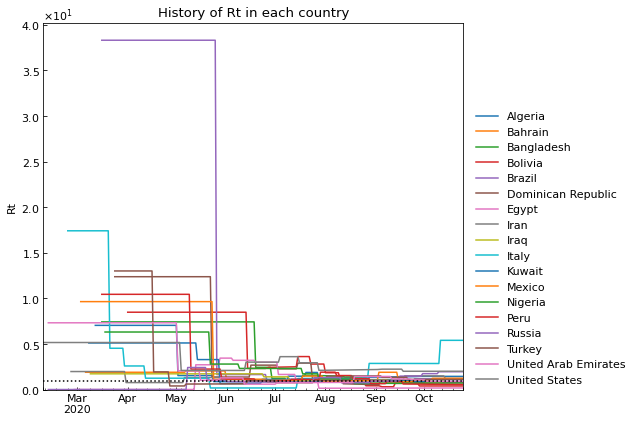

Country,Algeria,Bahrain,Bangladesh,Bolivia,Brazil,Dominican Republic,Egypt,Iran,Iraq,Italy,Kuwait,Mexico,Nigeria,Peru,Russia,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,,,
2020-10-21,1.46,0.85,0.85,0.41,1.19,0.8,0.19,1.23,1.17,5.41,0.9,1.25,0.73,0.56,1.97,1.13,0.92,2.02
2020-10-22,1.46,0.85,0.85,0.41,1.19,0.8,0.19,1.23,1.17,5.41,0.9,1.25,0.73,0.56,1.97,1.13,0.92,2.02
2020-10-23,1.46,0.85,0.85,0.41,1.19,0.8,0.19,1.23,1.17,5.41,0.9,1.25,0.73,0.56,1.97,1.13,0.92,2.02
2020-10-24,1.46,0.85,0.85,0.41,1.19,0.8,0.19,1.23,1.17,5.41,0.9,1.25,0.73,0.56,1.97,1.13,0.92,2.02
2020-10-25,1.46,0.85,0.85,0.41,1.19,0.8,0.19,1.23,1.17,5.41,0.9,1.25,0.73,0.56,1.97,1.13,0.92,2.02


In [14]:
analyser.history("Rt", roll_window=None).tail()

### $\rho$: Effective contact rate $\mathrm{[-]}$

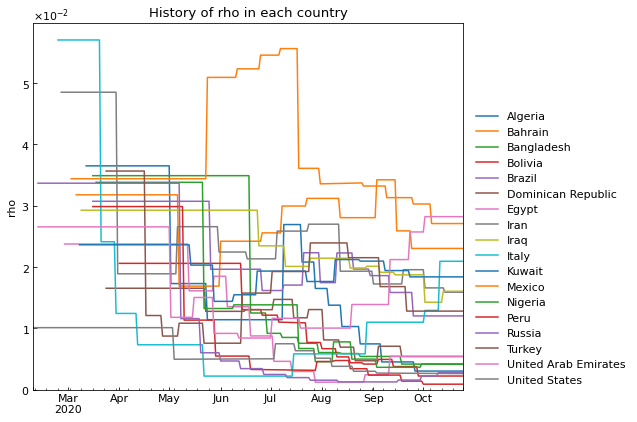

Country,Algeria,Bahrain,Bangladesh,Bolivia,Brazil,Dominican Republic,Egypt,Iran,Iraq,Italy,Kuwait,Mexico,Nigeria,Peru,Russia,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,,,
2020-10-21,0.003037,0.023027,0.004138,0.00223,0.012026,0.005403,0.005449,0.015889,0.016048,0.020933,0.018391,0.027082,0.004208,0.0009,0.002774,0.012811,0.028207,0.002622
2020-10-22,0.003037,0.023027,0.004138,0.00223,0.012026,0.005403,0.005449,0.015889,0.016048,0.020933,0.018391,0.027082,0.004208,0.0009,0.002774,0.012811,0.028207,0.002622
2020-10-23,0.003037,0.023027,0.004138,0.00223,0.012026,0.005403,0.005449,0.015889,0.016048,0.020933,0.018391,0.027082,0.004208,0.0009,0.002774,0.012811,0.028207,0.002622
2020-10-24,0.003037,0.023027,0.004138,0.00223,0.012026,0.005403,0.005449,0.015889,0.016048,0.020933,0.018391,0.027082,0.004208,0.0009,0.002774,0.012811,0.028207,0.002622
2020-10-25,0.003037,0.023027,0.004138,0.00223,0.012026,0.005403,0.005449,0.015889,0.016048,0.020933,0.018391,0.027082,0.004208,0.0009,0.002774,0.012811,0.028207,0.002622


In [15]:
analyser.history("rho", roll_window=None).tail()

### $\sigma$: Recovery rate $\mathrm{[-]}$

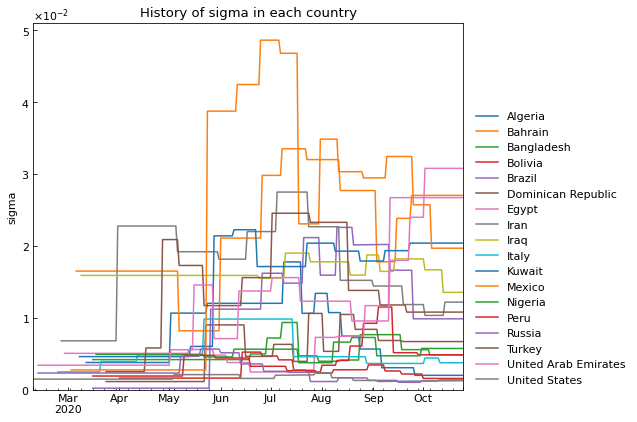

Country,Algeria,Bahrain,Bangladesh,Bolivia,Brazil,Dominican Republic,Egypt,Iran,Iraq,Italy,Kuwait,Mexico,Nigeria,Peru,Russia,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,,,
2020-10-21,0.001998,0.027007,0.00483,0.004851,0.009851,0.006691,0.026694,0.01217,0.013531,0.003745,0.020376,0.019665,0.005733,0.001563,0.001373,0.010785,0.030764,0.001252
2020-10-22,0.001998,0.027007,0.00483,0.004851,0.009851,0.006691,0.026694,0.01217,0.013531,0.003745,0.020376,0.019665,0.005733,0.001563,0.001373,0.010785,0.030764,0.001252
2020-10-23,0.001998,0.027007,0.00483,0.004851,0.009851,0.006691,0.026694,0.01217,0.013531,0.003745,0.020376,0.019665,0.005733,0.001563,0.001373,0.010785,0.030764,0.001252
2020-10-24,0.001998,0.027007,0.00483,0.004851,0.009851,0.006691,0.026694,0.01217,0.013531,0.003745,0.020376,0.019665,0.005733,0.001563,0.001373,0.010785,0.030764,0.001252
2020-10-25,0.001998,0.027007,0.00483,0.004851,0.009851,0.006691,0.026694,0.01217,0.013531,0.003745,0.020376,0.019665,0.005733,0.001563,0.001373,0.010785,0.030764,0.001252


In [16]:
analyser.history("sigma", roll_window=None).tail()

### $\kappa$: Mortality rate of infected cases $\mathrm{[-]}$

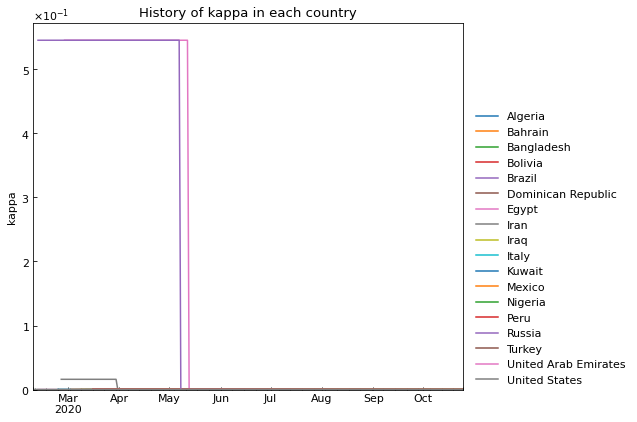

Country,Algeria,Bahrain,Bangladesh,Bolivia,Brazil,Dominican Republic,Egypt,Iran,Iraq,Italy,Kuwait,Mexico,Nigeria,Peru,Russia,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,,,
2020-10-21,0.000048,0.000059,0.00006,0.000039,0.000106,0.000071,0.000059,0.000296,0.000237,0.000122,0.000071,0.000421,0.000031,0.000008,0.000036,0.000517,0.000057,0.000046
2020-10-22,0.000048,0.000059,0.00006,0.000039,0.000106,0.000071,0.000059,0.000296,0.000237,0.000122,0.000071,0.000421,0.000031,0.000008,0.000036,0.000517,0.000057,0.000046
2020-10-23,0.000048,0.000059,0.00006,0.000039,0.000106,0.000071,0.000059,0.000296,0.000237,0.000122,0.000071,0.000421,0.000031,0.000008,0.000036,0.000517,0.000057,0.000046
2020-10-24,0.000048,0.000059,0.00006,0.000039,0.000106,0.000071,0.000059,0.000296,0.000237,0.000122,0.000071,0.000421,0.000031,0.000008,0.000036,0.000517,0.000057,0.000046
2020-10-25,0.000048,0.000059,0.00006,0.000039,0.000106,0.000071,0.000059,0.000296,0.000237,0.000122,0.000071,0.000421,0.000031,0.000008,0.000036,0.000517,0.000057,0.000046


In [17]:
analyser.history("kappa", roll_window=None).tail()

### $\theta$: Mortality rate of S$^\ast$ cases $\mathrm{[-]}$

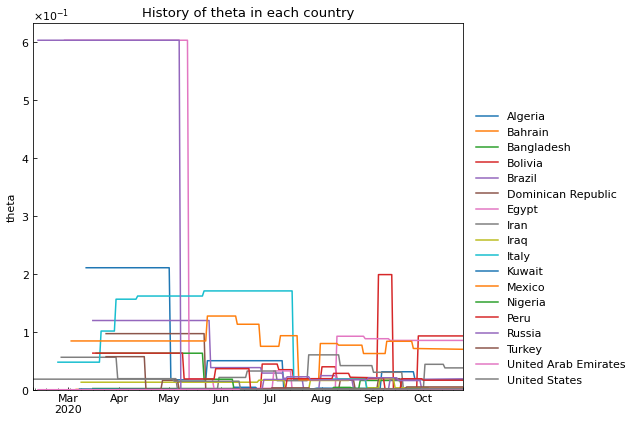

Country,Algeria,Bahrain,Bangladesh,Bolivia,Brazil,Dominican Republic,Egypt,Iran,Iraq,Italy,Kuwait,Mexico,Nigeria,Peru,Russia,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,,,
2020-10-21,0.017381,0.002688,0.000288,0.092735,0.018727,0.000931,0.085019,0.037618,0.000108,0.00006,0.001303,0.069693,0.000947,0.0164,0.001843,0.00479,0.000164,0.001549
2020-10-22,0.017381,0.002688,0.000288,0.092735,0.018727,0.000931,0.085019,0.037618,0.000108,0.00006,0.001303,0.069693,0.000947,0.0164,0.001843,0.00479,0.000164,0.001549
2020-10-23,0.017381,0.002688,0.000288,0.092735,0.018727,0.000931,0.085019,0.037618,0.000108,0.00006,0.001303,0.069693,0.000947,0.0164,0.001843,0.00479,0.000164,0.001549
2020-10-24,0.017381,0.002688,0.000288,0.092735,0.018727,0.000931,0.085019,0.037618,0.000108,0.00006,0.001303,0.069693,0.000947,0.0164,0.001843,0.00479,0.000164,0.001549
2020-10-25,0.017381,0.002688,0.000288,0.092735,0.018727,0.000931,0.085019,0.037618,0.000108,0.00006,0.001303,0.069693,0.000947,0.0164,0.001843,0.00479,0.000164,0.001549


In [18]:
analyser.history("theta", roll_window=None).tail()

## (Experimental): Relationship of OxCGRT index and parameter values
Government responses will impact on parameter values of ODE models about 14 days later. Here, we will investigate on the relationship of [stringency index (from OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md) and reproduction number/model parameters.


In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
df = analyser.track()
param_cols = ["Rt", *cs.SIRF.PARAMETERS]
oxcgrt_cols = oxcgrt_data.OXCGRT_VARS[:]
cols = param_cols + oxcgrt_cols
delay = 14

for col in param_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df.groupby("Country")[col].shift(0 - delay)

df = df.dropna(how="any")
df = df.loc[:, ["Date", "Country", *cols]]
track_df = df.copy()
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51097 entries, 0 to 51334
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 51097 non-null  datetime64[ns]
 1   Country                              51097 non-null  object        
 2   Rt                                   51097 non-null  float64       
 3   theta                                51097 non-null  float64       
 4   kappa                                51097 non-null  float64       
 5   rho                                  51097 non-null  float64       
 6   sigma                                51097 non-null  float64       
 7   School_closing                       51097 non-null  int64         
 8   Workplace_closing                    51097 non-null  int64         
 9   Cancel_events                        51097 non-null  int64         
 10  Gatherings

In [21]:
# Correlation
df = track_df.copy()
df.corr().style.background_gradient(axis=None)

,Rt,theta,kappa,rho,sigma,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
Rt,1.000000,-0.291055,-0.313469,0.271056,-0.144758,0.067102,0.142008,-0.034262,0.062317,0.016514,0.025463,0.037435,-0.135673,-0.032691,-0.153377,-0.301221,0.045511
theta,-0.291055,1.000000,0.985200,0.747911,-0.043111,-0.277890,-0.151379,-0.338614,-0.219647,-0.242341,0.168462,-0.001566,0.128354,-0.379267,-0.361883,-0.025718,-0.132262
kappa,-0.313469,0.985200,1.000000,0.736911,-0.088954,-0.295843,-0.167971,-0.344305,-0.199403,-0.234117,0.162545,0.011652,0.158916,-0.384183,-0.319781,-0.041046,-0.147896
rho,0.271056,0.747911,0.736911,1.000000,0.140910,-0.198096,-0.049433,-0.314294,-0.127350,-0.177833,0.223912,0.053707,0.097067,-0.350262,-0.471242,-0.170568,-0.032446
sigma,-0.144758,-0.043111,-0.088954,0.140910,1.000000,0.141990,-0.003350,0.070645,-0.038356,0.069382,0.043750,0.009541,-0.051597,0.074389,-0.154557,0.111115,0.120699
School_closing,0.067102,-0.277890,-0.295843,-0.198096,0.141990,1.000000,0.699400,0.751899,0.642742,0.532669,0.525273,0.559281,0.445525,0.744830,0.483654,0.328263,0.807643
Workplace_closing,0.142008,-0.151379,-0.167971,-0.049433,-0.003350,0.699400,1.000000,0.736259,0.666203,0.461652,0.589847,0.497738,0.436915,0.801788,0.522469,0.340444,0.796172
Cancel_events,-0.034262,-0.338614,-0.344305,-0.314294,0.070645,0.751899,0.736259,1.000000,0.634104,0.392349,0.443486,0.436845,0.471775,0.893559,0.630422,0.600300,0.759460
Gatherings_restrictions,0.062317,-0.219647,-0.199403,-0.127350,-0.038356,0.642742,0.666203,0.634104,1.000000,0.699096,0.674419,0.714460,0.517464,0.664392,0.469943,0.255967,0.842362
Transport_closing,0.016514,-0.242341,-0.234117,-0.177833,0.069382,0.532669,0.461652,0.392349,0.699096,1.000000,0.560136,0.695666,0.486537,0.436081,0.201849,0.095122,0.758006


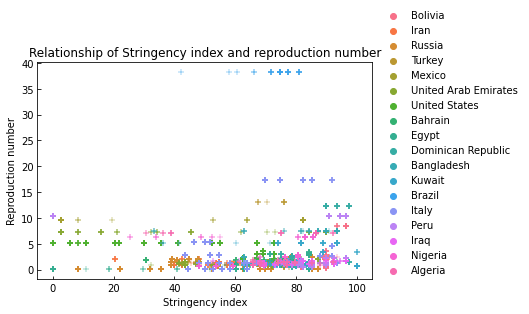

In [22]:
# Scatter plot of Stringency index and Rt
df = track_df.copy()
sns.scatterplot(data=df, x="Stringency_index", y="Rt", hue="Country", legend="brief", marker="+")
bbox_to_anchor=(1.02, 0)
bbox_loc="lower left"
plt.legend(bbox_to_anchor=bbox_to_anchor, loc=bbox_loc, borderaxespad=0)
plt.title("Relationship of Stringency index and reproduction number")
plt.ylabel("Reproduction number")
plt.xlabel("Stringency index")
plt.show()